<a href="https://colab.research.google.com/github/piaseckazaneta/Python/blob/main/Python_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing and importing required libraries

This command installs the required Python libraries in the Colab environment:

- geopandas – for working with geospatial vector data

- matplotlib – for plotting maps and charts

- requests – for downloading files from the internet

Colab does not keep installed libraries between sessions, so this step is required.

In [1]:
!pip install matplotlib geopandas requests

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

Downloading the dataset (Warsaw districts)

This code sends an HTTP GET request to download a GeoJSON file containing the administrative boundaries of Warsaw districts from GitHub.

In [3]:
url = "https://raw.githubusercontent.com/andilabs/warszawa-dzielnice-geojson/master/warszawa-dzielnice.geojson"
r = requests.get(url)

Saving the downloaded file locally

Explanation:
The downloaded content is saved as a local file in the Colab runtime:

- "wb" means write binary

- this allows GeoPandas to read the file in the next step


In [6]:
with open("warszawa-dzielnice.geojson", "wb") as f:
  f.write(r.content)

print("Plik dzielnic pobrany pomyślnie")

Plik dzielnic pobrany pomyślnie


Loading the GeoJSON into GeoPandas

This reads the GeoJSON file and loads it into a GeoDataFrame, which is a Pandas DataFrame with a geometry column.

In [7]:
gdf = gpd.read_file("warszawa-dzielnice.geojson")

Exploring the dataset structure

info() shows the columns, data types, and geometry type

head() displays the first few rows to understand the attribute data

This is a standard first step in any data analysis workflow.

In [8]:
print("📊 Info o geometrii i kolumnach:")
print(gdf.info())
print(gdf.head())

📊 Info o geometrii i kolumnach:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cartodb_id  19 non-null     int32   
 1   name        19 non-null     object  
 2   geometry    19 non-null     geometry
dtypes: geometry(1), int32(1), object(1)
memory usage: 512.0+ bytes
None
   cartodb_id       name                                           geometry
0           1   Warszawa  MULTIPOLYGON (((21.02753 52.36513, 21.02539 52...
1          22     Ochota  MULTIPOLYGON (((21.00152 52.22807, 20.99059 52...
2          25  Rembertów  MULTIPOLYGON (((21.13242 52.23909, 21.13313 52...
3           2     Bemowo  MULTIPOLYGON (((20.87309 52.21666, 20.87307 52...
4          19  Białołęka  MULTIPOLYGON (((20.99622 52.28734, 20.99782 52...


Plotting a basic map

This creates a simple static map of Warsaw districts:

- figsize controls the map size

- edgecolor highlights district borders

- axes are turned off for a cleaner cartographic output

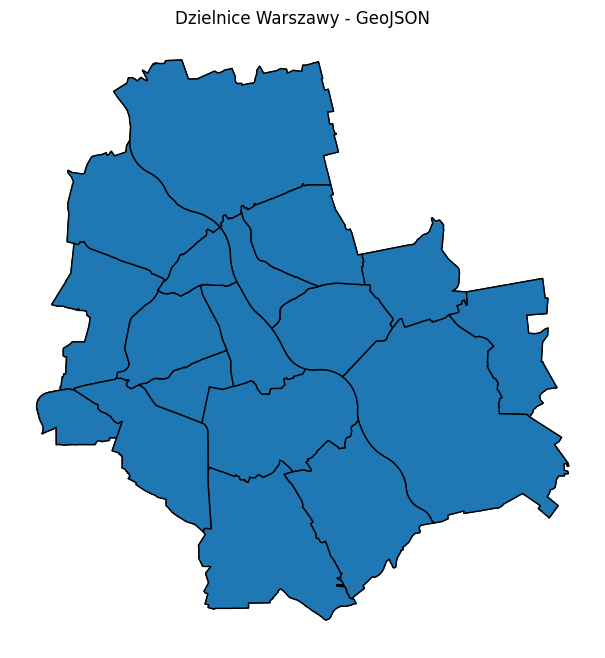

In [10]:
ax = gdf.plot(figsize=(8, 8), edgecolor='black', column=None)
ax.set_title("Dzielnice Warszawy - GeoJSON")
plt.axis('off')
plt.show()
